In [1]:
import pandas as pd
import numpy as np
import sklearn

Q1 A

In [2]:
data = {
    "f_id": [1, 2, 3, 4, 5, 6],
    "weight": [180, 200, 150, 170, 160, 140],
    "sweet": [7, 6, 4, 5, 6, 3],
    "label": ["Apple", "Apple", "Orange", "Orange", "Apple", "Orange"]
}

df = pd.DataFrame(data)

In [3]:
new={'weight':165,'sweet':5.5}

df['distance']=np.sqrt((df['weight']-new['weight'])**2 + (df['sweet']-new['sweet'])**2)

df

,f_id,weight,sweet,label,distance
0,1,180,7,Apple,15.074813
1,2,200,6,Apple,35.003571
2,3,150,4,Orange,15.074813
3,4,170,5,Orange,5.024938
4,5,160,6,Apple,5.024938
5,6,140,3,Orange,25.124689


In [4]:
k=3
nearest=df.nsmallest(k,'distance')

label_count=nearest['label'].value_counts()
final=label_count.idxmax()

nearest

,f_id,weight,sweet,label,distance
3,4,170,5,Orange,5.024938
4,5,160,6,Apple,5.024938
0,1,180,7,Apple,15.074813


In [5]:
final

'Apple'

In [6]:
df['man_dist']=np.abs(df['weight']-new['weight'])+ np.abs(df['sweet']-new['sweet'])
p=2
df['mink_dist']=np.power(np.abs(df['weight']-new['weight'])**p + np.abs(df['sweet']-new['sweet'])**p, 1/p)
df[['distance','man_dist','mink_dist']]

,distance,man_dist,mink_dist
0,15.074813,16.5,15.074813
1,35.003571,35.5,35.003571
2,15.074813,16.5,15.074813
3,5.024938,5.5,5.024938
4,5.024938,5.5,5.024938
5,25.124689,27.5,25.124689


In [7]:
import matplotlib.pyplot as plt

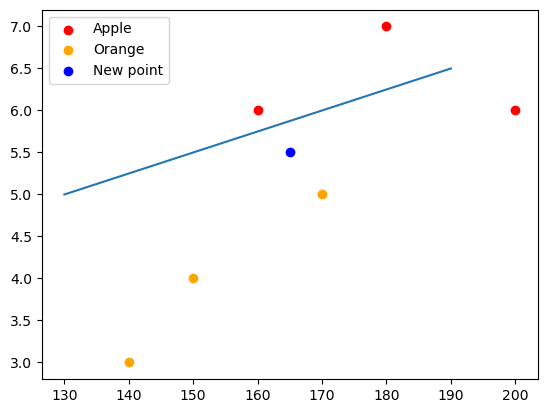

In [8]:
apple=df[df['label']=='Apple']
plt.scatter(apple['weight'],apple['sweet'],color='red',marker='o',label='Apple')
orange=df[df['label']=='Orange']
plt.scatter(orange['weight'],orange['sweet'],color='orange',marker='o',label='Orange')
plt.scatter([new['weight']],[new['sweet']],color='blue',label='New point')
plt.plot([130,190],[5,6.5],linestyle='-')
plt.legend()

Q1 B

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)

knn.fit(df.drop(columns=['label','f_id','distance','man_dist','mink_dist']),df['label'])

KNeighborsClassifier(n_neighbors=3)

In [11]:
new_df=pd.DataFrame([new])

In [12]:
pred=knn.predict(new_df)
pred

array(['Orange'], dtype=object)

Q2 A

In [13]:
data = {
    "pid": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "age": [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    "bp": ["High", "Low", "High", "Low", "High", "Low", "High", "Low", "High", "Low"],
    "cholestrol": ["High", "Normal", "High", "Normal", "High", "Normal", "High", "Normal", "High", "Normal"],
    "diagnosis": ["Sick", "Healthy", "Sick", "Healthy", "Sick", "Healthy", "Sick", "Healthy", "Sick", "Healthy"]
}

df = pd.DataFrame(data)
df

,pid,age,bp,cholestrol,diagnosis
0,1,30,High,High,Sick
1,2,45,Low,Normal,Healthy
2,3,50,High,High,Sick
3,4,35,Low,Normal,Healthy
4,5,60,High,High,Sick
5,6,55,Low,Normal,Healthy
6,7,40,High,High,Sick
7,8,25,Low,Normal,Healthy
8,9,65,High,High,Sick
9,10,45,Low,Normal,Healthy


In [14]:
healthy_count=len(df[df['diagnosis']=='Healthy'])
sick_count=len(df[df['diagnosis']=='Sick'])

print(healthy_count)
print(sick_count)

5
5


In [15]:
p_healthy=healthy_count/len(df)
p_sick=sick_count/len(df)

In [16]:
entropy=0
entropy-=p_healthy*np.log2(p_healthy)
entropy-=p_sick*np.log2(p_sick)
    
entropy

1.0

In [17]:
weighted_entropy_age = 0
unique_ages = df['age'].unique()

for age in unique_ages:
    subset = df[df['age'] == age]
    subset_counts = subset['diagnosis'].value_counts()
    subset_total = subset_counts.sum()
    
    if subset_total > 0:
        subset_probabilities = subset_counts / subset_total
        subset_entropy = -np.sum(subset_probabilities * np.log2(subset_probabilities))
        weighted_entropy_age += (subset_total / len(df)) * subset_entropy

information_gain_age = entropy - weighted_entropy_age
print(f"Information Gain for Age: {information_gain_age:.4f}")

Information Gain for Age: 1.0000


In [18]:
weighted_entropy_bp = 0
unique_bps = df['bp'].unique()

for bp in unique_bps:
    subset = df[df['bp'] == bp]
    subset_counts = subset['diagnosis'].value_counts()
    subset_total = subset_counts.sum()
    
    if subset_total > 0:
        subset_probabilities = subset_counts / subset_total
        subset_entropy = -np.sum(subset_probabilities * np.log2(subset_probabilities))
        weighted_entropy_age += (subset_total / len(df)) * subset_entropy

information_gain_bp = entropy - weighted_entropy_bp
print(f"Information Gain for BP: {information_gain_bp:.4f}")

Information Gain for BP: 1.0000


In [19]:
weighted_entropy_chol = 0
unique_cholestrols = df['cholestrol'].unique()

for cholestrol in unique_cholestrols:
    subset = df[df['cholestrol'] == age]
    subset_counts = subset['diagnosis'].value_counts()
    subset_total = subset_counts.sum()
    
    if subset_total > 0:
        subset_probabilities = subset_counts / subset_total
        subset_entropy = -np.sum(subset_probabilities * np.log2(subset_probabilities))
        weighted_entropy_age += (subset_total / len(df)) * subset_entropy

information_gain_cholestrol = entropy - weighted_entropy_chol
print(f"Information Gain for Cholestrol: {information_gain_cholestrol:.4f}")

Information Gain for Cholestrol: 1.0000


In [20]:
# Root Node is the feature with the highest information gain. Let Age be the root node with IG=1.0